In [199]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import HDBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [200]:
from sklearn.datasets import load_digits
import pandas as pd

# 데이터셋 불러오기
digits = load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=12345)

pca = PCA(n_components=40)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

LR = LogisticRegression(max_iter=10000, random_state=12345)


X_LR = LR.fit(X_train_pca, y_train)

In [201]:
X_LR

LogisticRegression(max_iter=10000, random_state=12345)

In [202]:
y_pred = X_LR.predict(X_test_pca)

In [203]:
X_LR.score(X_test_pca, y_test)

0.975

In [204]:
confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 29]], dtype=int64)

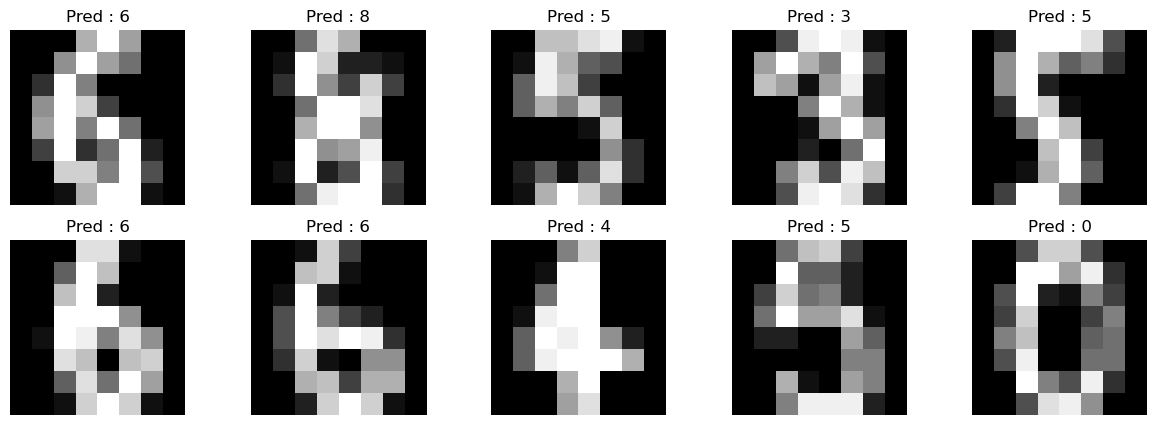

In [205]:
fig, axes = plt.subplots(2,5, figsize=(15,5))

# ravel : ax(서브플롯들)을 만들 때 2행 5열로 만들어져서 2차원 배열로 만들어져 shape = (2,5)인 배열이 되는데,
# axes.ravel()을 쓰면 1차원 배열로 바뀌어 shape = (1,10) 이 된다.
# 이걸 쓰는 이유는 for문에서 편하게 순회하기 위해서이다.
for ax,img,label in zip(axes.ravel(), X_test, y_pred): # 그래프 하나하나 순회하면서 이미지 그리고 제목에 예측값 기입
    ax.imshow(img.reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred : {label}")
    ax.axis("off")

plt.show()

In [206]:
axes.ravel()[1]

<Axes: title={'center': 'Pred : 8'}>